<a href="https://colab.research.google.com/github/the-sara/convo_networks/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#AlexNet

In [ ]:
#importing :
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
#loading and unziping the dataset:
from zipfile import ZipFile
with ZipFile('cars.zip','r') as zip:
    zip.extractall('dataset')
print("file is extracted ")

file is extracted 


In [ ]:
print(os.listdir('dataset'))

['Cars Dataset']


In [ ]:
# spliting th dataset
train_dataset=tf.keras.utils.image_dataset_from_directory(
    'dataset/Cars Dataset/train',
    image_size=(224,224),
    batch_size=32
)
val_dataset=tf.keras.utils.image_dataset_from_directory(
    'dataset/Cars Dataset/test',
    image_size=(224,224),
    batch_size=32
)

Found 3352 files belonging to 7 classes.
Found 813 files belonging to 7 classes.


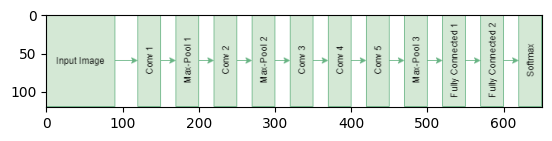

In [ ]:
#model layers :
# i ll be foollwing classic AlexNet architecture :
alex_net_arch=cv2.imread('AlexNet.png')
plt.imshow(alex_net_arch)

In [ ]:
input_layer=tf.keras.layers.Input(shape=(224,224,3))
conv1=tf.keras.layers.Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),activation='relu')
pool1=tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2))
conv2=tf.keras.layers.Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),activation='relu')
pool2=tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2))
conv3=tf.keras.layers.Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),activation='relu')
conv4=tf.keras.layers.Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),activation='relu')
conv5=tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),activation='relu')
pool3=tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2))
flatten=tf.keras.layers.Flatten()
dense1=tf.keras.layers.Dense(units=4096,activation='relu')
dense2=tf.keras.layers.Dense(units=4096,activation='relu')
dense3=tf.keras.layers.Dense(units=196,activation='softmax')


In [ ]:
#building the sequential model :
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(input_layer)
model.add(conv1)
model.add(pool1)
model.add(conv2)
model.add(pool2)
model.add(conv3)
model.add(conv4)
model.add(conv5)
model.add(pool3)
model.add(flatten)
model.add(dense1)
model.add(dense2)
model.add(dense3)

In [ ]:
#model compiling :
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#training :
history=model.fit(train_dataset,validation_data=val_dataset,epochs=10)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.2054 - loss: 4.0497 - val_accuracy: 0.2448 - val_loss: 1.8583
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.2370 - loss: 1.9341 - val_accuracy: 0.2522 - val_loss: 3.3831
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.2401 - loss: 2.8604 - val_accuracy: 0.2472 - val_loss: 1.8670
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.2340 - loss: 2.2841 - val_accuracy: 0.2460 - val_loss: 1.8572
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.2375 - loss: 1.8728 - val_accuracy: 0.2460 - val_loss: 1.8542
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.2310 - loss: 1.8729 - val_accuracy: 0.2460 - val_loss: 1.8542
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.2326 - loss: 1.8709 - val_accuracy: 0.2460 - val_loss: 1.8534
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.2388 - loss: 1.8673 - val_accu

In [ ]:
#model evaluation :
#the fit methode returns a history object  that has an attr called history which is basically a dic :
history_df=pd.DataFrame(history.history)
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.218675,4.089317,0.244772,1.858337
1,0.237172,1.918544,0.252153,3.383069
2,0.244033,3.030822,0.247232,1.867021
3,0.236874,2.218277,0.246002,1.857152
4,0.242243,1.860342,0.246002,1.854234
5,0.240155,1.860114,0.246002,1.854198
6,0.230609,1.859578,0.246002,1.853415
7,0.241050,1.859618,0.246002,1.852252
8,0.238365,1.858755,0.246002,1.852866
9,0.235979,1.858164,0.246002,1.853314


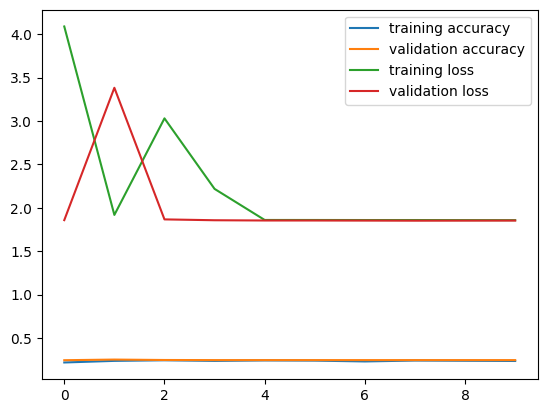

In [ ]:
#now we have the datatframe so we plt the history values according versus the epoches
x=history_df.index
y1=history_df['accuracy']
y2=history_df['val_accuracy']
y4=history_df['val_loss']
y3=history_df['loss']
plt.plot(x,y1,label='training accuracy')
plt.plot(x,y2,label='validation accuracy')
plt.plot(x,y3,label='training loss')
plt.plot(x,y4,label='validation loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Audi


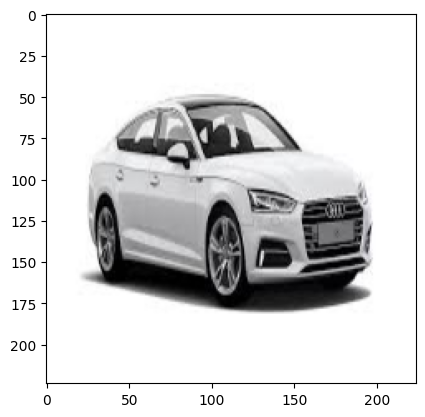

In [ ]:
#prediction:
prediction_img=cv2.imread("audi_test.jpg")
prediction_img=cv2.cvtColor(prediction_img,cv2.COLOR_BGR2RGB)
prediction_img=cv2.resize(prediction_img,(224,224))
plt.imshow(prediction_img)
prediction_img=np.expand_dims(prediction_img,axis=0)
pred=model.predict(prediction_img)
classes=train_dataset.class_names
print(classes[np.argmax(pred)])